# Работы с датасетом (начало)

In [25]:
import pandas as pd

In [26]:
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt

Работаем с таблицей о велосипедах

In [2]:
bikes = pd.read_csv('data/BikeData.csv')

print(bikes.shape)
bikes.head()

(8760, 12)


,Date,Hour,Temperature,Humidity,Wind speed,Rainfall,Snowfall,Seasons,Holiday,Functioning Day,Partner 1,Partner 2
0,01/12/2017,0,-5.2,37,2.2,0.0,0.0,Winter,No Holiday,Yes,207,50
1,01/12/2017,1,-5.5,38,0.8,0.0,0.0,Winter,No Holiday,Yes,139,80
2,01/12/2017,2,-6.0,39,1.0,0.0,0.0,Winter,No Holiday,Yes,22,140
3,01/12/2017,3,-6.2,40,0.9,0.0,0.0,Winter,No Holiday,Yes,43,105
4,01/12/2017,4,-6.0,36,2.3,0.0,0.0,Winter,No Holiday,Yes,59,38


## Обзор

In [4]:
bikes.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8760 entries, 0 to 8759
Data columns (total 12 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Date             8760 non-null   object 
 1   Hour             8760 non-null   int64  
 2   Temperature      8581 non-null   float64
 3   Humidity         8760 non-null   int64  
 4   Wind speed       8760 non-null   float64
 5   Rainfall         8760 non-null   float64
 6   Snowfall         8760 non-null   float64
 7   Seasons          8760 non-null   object 
 8   Holiday          8760 non-null   object 
 9   Functioning Day  8760 non-null   object 
 10  Partner 1        8760 non-null   int64  
 11  Partner 2        8760 non-null   int64  
dtypes: float64(4), int64(4), object(4)
memory usage: 821.4+ KB


In [5]:
bikes.describe()

,Hour,Temperature,Humidity,Wind speed,Rainfall,Snowfall,Partner 1,Partner 2
count,8760.000000,8581.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000
mean,11.500000,12.878557,58.226256,1.724909,0.148687,0.075068,345.656507,350.925571
std,6.922582,11.955551,20.362413,1.036300,1.128193,0.436746,415.816299,425.687048
min,0.000000,-17.800000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,5.750000,3.400000,42.000000,0.900000,0.000000,0.000000,57.000000,56.000000
50%,11.500000,13.700000,57.000000,1.500000,0.000000,0.000000,186.000000,182.000000
75%,17.250000,22.500000,74.000000,2.300000,0.000000,0.000000,487.000000,499.250000
max,23.000000,39.400000,98.000000,7.400000,35.000000,8.800000,3101.000000,3039.000000


Мы видим, что ненулевых значений в стобце `'Temperature'` не `8760`, а `8581`. Запомним это.

In [15]:
bikes['Hour']

0        0
1        1
2        2
3        3
4        4
        ..
8755    19
8756    20
8757    21
8758    22
8759    23
Name: Hour, Length: 8760, dtype: int64

In [16]:
bikes['Hour'].unique()  # посмотреть уникальные значения

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
       17, 18, 19, 20, 21, 22, 23], dtype=int64)

In [6]:
bikes['Functioning Day'].unique()

array(['Yes', 'No'], dtype=object)

In [18]:
bikes['Seasons'].unique()

array(['Winter', 'Spring', 'Summer', 'Autumn'], dtype=object)

In [19]:
bikes['Holiday'].unique()

array(['No Holiday', 'Holiday'], dtype=object)

In [20]:
bikes["Holiday"].value_counts()

Holiday
No Holiday    8328
Holiday        432
Name: count, dtype: int64

In [21]:
bikes["Holiday"].value_counts() / 24

Holiday
No Holiday    347.0
Holiday        18.0
Name: count, dtype: float64

In [22]:
bikes["Holiday"].value_counts() // 24

Holiday
No Holiday    347
Holiday        18
Name: count, dtype: int64

In [7]:
bikes[['Partner 1', 'Partner 2']]

,Partner 1,Partner 2
0,207,50
1,139,80
2,22,140
3,43,105
4,59,38
...,...,...
8755,467,177
8756,296,63
8757,571,665
8758,171,457


In [8]:
bikes.iloc[124]  # вывести 124ую по счёту строку

Date               06/12/2017
Hour                        4
Temperature              -3.4
Humidity                   75
Wind speed                0.0
Rainfall                  0.0
Snowfall                  0.4
Seasons                Winter
Holiday            No Holiday
Functioning Day           Yes
Partner 1                  36
Partner 2                   4
Name: 124, dtype: object

In [9]:
bikes.iloc[124]['Holiday']  # это был не выходной

'No Holiday'

Заведём новый столбец `Total`, сумма числа велосипедов сданных в прокат в этот час, в обоих партнёрских центрах.

In [9]:
bikes["Total"] = bikes["Partner 1"] + bikes["Partner 2"]
bikes

,Date,Hour,Temperature,Humidity,Wind speed,Rainfall,Snowfall,Seasons,Holiday,Functioning Day,Partner 1,Partner 2,Total
0,01/12/2017,0,-5.2,37,2.2,0.0,0.0,Winter,No Holiday,Yes,207,50,257
1,01/12/2017,1,-5.5,38,0.8,0.0,0.0,Winter,No Holiday,Yes,139,80,219
2,01/12/2017,2,-6.0,39,1.0,0.0,0.0,Winter,No Holiday,Yes,22,140,162
3,01/12/2017,3,-6.2,40,0.9,0.0,0.0,Winter,No Holiday,Yes,43,105,148
4,01/12/2017,4,-6.0,36,2.3,0.0,0.0,Winter,No Holiday,Yes,59,38,97
...,...,...,...,...,...,...,...,...,...,...,...,...,...
8755,30/11/2018,19,4.2,34,2.6,0.0,0.0,Autumn,No Holiday,Yes,467,177,644
8756,30/11/2018,20,3.4,37,2.3,0.0,0.0,Autumn,No Holiday,Yes,296,63,359
8757,30/11/2018,21,2.6,39,0.3,0.0,0.0,Autumn,No Holiday,Yes,571,665,1236
8758,30/11/2018,22,2.1,41,1.0,0.0,0.0,Autumn,No Holiday,Yes,171,457,628


### Тренировка

попробуем поставить исследовательские вопросы


❓Какие графики хотелось бы построить?

* когда больше велосипедов, в выходные или не в выходные?  (Соотв. гипотеза — "В выходные больше берут")
* как зависит количество взятых в прокат велосипедов от времени года?
* как зависит количество взятых в прокат велосипедов от температуры?
* как зависит количество взятых в прокат велосипедов от времени суток?

In [27]:
bikes["Total"].mean()

696.5820776255708

In [28]:
bikes["Total"].std()

749.8126131159588

большое стд. отклонение. Бывает берут совсем мало, бывает много

In [29]:
bikes.groupby("Holiday")["Total"].mean()

Holiday
Holiday       470.023148
No Holiday    708.334414
Name: Total, dtype: float64

In [30]:
bikes.groupby("Holiday")["Total"].sum()

Holiday
Holiday        203050
No Holiday    5899009
Name: Total, dtype: int64

<Axes: ylabel='Frequency'>

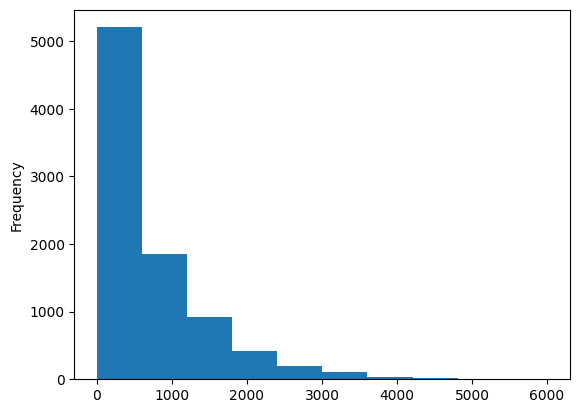

In [34]:
bikes["Total"].plot.hist()

<Axes: ylabel='Frequency'>

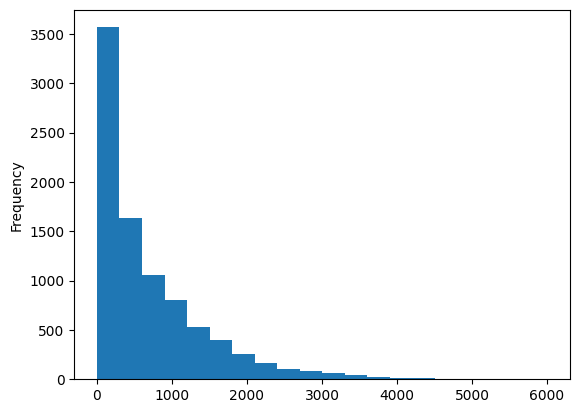

In [35]:
bikes["Total"].plot.hist(bins=20)

## Фильтрация и сортировка

### Фильтрация

In [37]:
bikes['Holiday'] == 'Holiday'

0       False
1       False
2       False
3       False
4       False
        ...  
8755    False
8756    False
8757    False
8758    False
8759    False
Name: Holiday, Length: 8760, dtype: bool

In [38]:
# Сколько выходных часов?
bikes[bikes['Holiday'] == 'Holiday'].shape

(432, 13)

<Axes: ylabel='Frequency'>

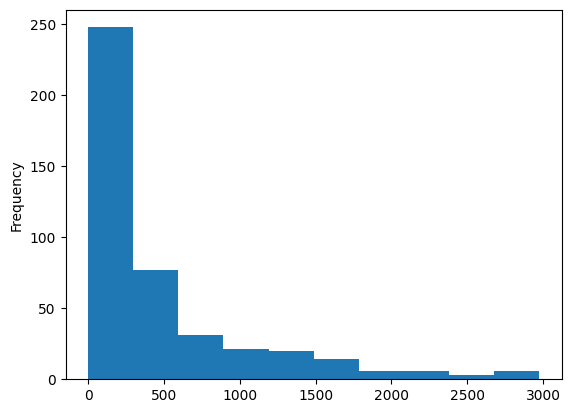

In [39]:
bikes[bikes['Holiday'] == 'Holiday']["Total"].plot.hist()

<Axes: ylabel='Frequency'>

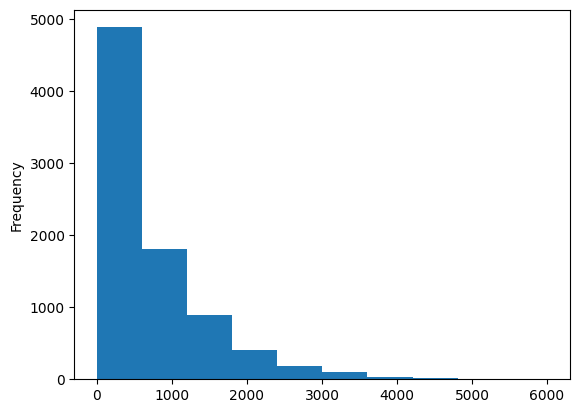

In [40]:
bikes[bikes['Holiday'] != 'Holiday']["Total"].plot.hist()

In [12]:
# Сколько выходных часов с температурой > 15?
bikes[(bikes['Holiday'] == 'Holiday') & 
      (bikes['Temperature'] > 15)].shape

(179, 12)

In [10]:
# Сколько выходных часов или/и тех, когда температура > 15?
bikes[(bikes['Holiday'] == 'Holiday') | 
      (bikes['Temperature'] > 15)].shape

(4293, 12)

In [17]:
# Сколько остальных часов? (в которых невыходные и при этом неправда, что температура > 15)
bikes[~((bikes['Holiday'] == 'Holiday') | 
      (bikes['Temperature'] > 15))].shape

(4467, 12)

In [20]:
# Проверка, что посчитали все часы из таблицы. Всего строк в таблице 8760 
4293 + 4467

8760

Почему тут выдаётся другое количество часов?

In [18]:
bikes[(bikes['Holiday'] == 'No Holiday') &  # подумать
      (bikes['Temperature'] <= 15)].shape

(4299, 12)

Потому что сюда не входят часы, когда не выходные и при этом `bikes['Temperature']` имеет нулевое значение `NaN`.

Мы узнали про часы с температурой >15, про часы с температурой <=15, а часы с `NaN` не входят не в первую группу, ни во вторую.

In [22]:
# Сколько всего нулевых значений?
bikes[bikes['Temperature'].isna()].shape

(179, 12)

In [24]:
# Сколько невыходных часов с температурой NaN?
bikes[(bikes['Holiday'] == 'No Holiday') & (bikes['Temperature'].isna())].shape

(168, 12)

In [25]:
# Проверка, что теперь мы учитываем все часы из таблицы. Всего строк в таблице 8760 
4293 + 4299 + 168

8760

**Вывод:**
1. Для отрицания условия используйте `~`
2. Помните, что нулевые значения могут не удовлетворять ни одному из написанных вами условий

До этого мы проверяли соответствие ячейки определённому значению.

Как проверить, что значение в ячейке есть в списке подходящих?

In [28]:
# Вот мы хотим данные только за осень и зиму
bikes[(bikes['Seasons'] == 'Autumn') | (bikes['Seasons'] == 'Winter')].shape

(4344, 12)

In [27]:
# Можно записать проще:
bikes[bikes['Seasons'].isin(['Winter', 'Autumn'])].shape

(4344, 12)

Можно использовать не список, а `range()`

In [29]:
# Таблица только про ночные часы (с полуночи до пяти утра)
bikes[bikes['Hour'].isin(range(0,5))]

,Date,Hour,Temperature,Humidity,Wind speed,Rainfall,Snowfall,Seasons,Holiday,Functioning Day,Partner 1,Partner 2
0,01/12/2017,0,-5.2,37,2.2,0.0,0.0,Winter,No Holiday,Yes,207,50
1,01/12/2017,1,-5.5,38,0.8,0.0,0.0,Winter,No Holiday,Yes,139,80
2,01/12/2017,2,-6.0,39,1.0,0.0,0.0,Winter,No Holiday,Yes,22,140
3,01/12/2017,3,-6.2,40,0.9,0.0,0.0,Winter,No Holiday,Yes,43,105
4,01/12/2017,4,-6.0,36,2.3,0.0,0.0,Winter,No Holiday,Yes,59,38
...,...,...,...,...,...,...,...,...,...,...,...,...
8736,30/11/2018,0,1.8,62,1.6,0.0,0.0,Autumn,No Holiday,Yes,224,109
8737,30/11/2018,1,1.3,63,2.0,0.0,0.0,Autumn,No Holiday,Yes,110,392
8738,30/11/2018,2,0.6,66,0.5,0.0,0.0,Autumn,No Holiday,Yes,274,52
8739,30/11/2018,3,-0.1,69,0.9,0.0,0.0,Autumn,No Holiday,Yes,32,84


Будьте осторожны, `range()` работает с целыми числами.

То есть, если вы смотрите температуру в `range(10, 15)`, вы находите часы с температурой `10`, `11`, `12`, `13`, `14`, но не `10.5`, например.

In [32]:
bikes[bikes['Temperature'].isin(range(10, 15))].shape  # это для целых чисел

(100, 12)

промежутки:
- конъюнкция условий
- `.between()`

❓Сколько в среднем берут велосипедов в рабочие часы? (С 9 до 17)

In [10]:
bikes[(bikes["Hour"] <= 17) & (bikes["Hour"] >= 9)]["Total"].mean()

751.9975646879757

In [12]:
# то же самое компактнее
bikes[bikes["Hour"].between(9, 17)]["Total"].mean()

751.9975646879757

### Тренировка — график

❓Какой тип графика поможет посмотреть зависимость количества взятых в прокат велосипедов от часа (для часов с 9 до 17)? Постройте этот график.  
❓Как проверить, складываются ли группы данных на таком графике в **кластеры**, в зависимости от времени года? (колонка `Seasons`)


### Сортировка

In [33]:
# Отсортируем температуру
bikes['Temperature'].sort_values()

1352   -17.8
1353   -17.5
1351   -17.5
1350   -17.4
1349   -16.9
        ... 
8669     NaN
8679     NaN
8710     NaN
8717     NaN
8742     NaN
Name: Temperature, Length: 8760, dtype: float64

In [34]:
# Отсортируем температуру по убывающей
bikes['Temperature'].sort_values(ascending=False)

5848    39.4
5847    39.3
5849    39.0
5846    38.7
5825    38.0
        ... 
8669     NaN
8679     NaN
8710     NaN
8717     NaN
8742     NaN
Name: Temperature, Length: 8760, dtype: float64

Заметим, что `NaN` всегда в конце.

Как отсортировать всю таблицу по столбцу с температурой?

In [35]:
bikes.sort_values(by=['Temperature'])

,Date,Hour,Temperature,Humidity,Wind speed,Rainfall,Snowfall,Seasons,Holiday,Functioning Day,Partner 1,Partner 2
1352,26/01/2018,8,-17.8,40,2.5,0.0,0.5,Winter,No Holiday,Yes,235,288
1353,26/01/2018,9,-17.5,37,3.8,0.0,0.5,Winter,No Holiday,Yes,76,26
1351,26/01/2018,7,-17.5,38,3.4,0.0,0.5,Winter,No Holiday,Yes,93,31
1350,26/01/2018,6,-17.4,40,1.6,0.0,0.5,Winter,No Holiday,Yes,33,18
1349,26/01/2018,5,-16.9,38,2.3,0.0,0.5,Winter,No Holiday,Yes,35,21
...,...,...,...,...,...,...,...,...,...,...,...,...
8669,27/11/2018,5,NaN,84,0.6,0.0,0.0,Autumn,No Holiday,Yes,118,58
8679,27/11/2018,15,NaN,70,2.1,0.0,0.0,Autumn,No Holiday,Yes,391,279
8710,28/11/2018,22,NaN,34,1.3,0.0,0.0,Autumn,No Holiday,Yes,476,558
8717,29/11/2018,5,NaN,34,0.9,0.0,0.0,Autumn,No Holiday,Yes,17,13


In [36]:
# А теперь по нескольким столбцам
bikes.sort_values(by=['Temperature', 'Humidity'])

,Date,Hour,Temperature,Humidity,Wind speed,Rainfall,Snowfall,Seasons,Holiday,Functioning Day,Partner 1,Partner 2
1352,26/01/2018,8,-17.8,40,2.5,0.0,0.5,Winter,No Holiday,Yes,235,288
1353,26/01/2018,9,-17.5,37,3.8,0.0,0.5,Winter,No Holiday,Yes,76,26
1351,26/01/2018,7,-17.5,38,3.4,0.0,0.5,Winter,No Holiday,Yes,93,31
1350,26/01/2018,6,-17.4,40,1.6,0.0,0.5,Winter,No Holiday,Yes,33,18
1349,26/01/2018,5,-16.9,38,2.3,0.0,0.5,Winter,No Holiday,Yes,35,21
...,...,...,...,...,...,...,...,...,...,...,...,...
5114,02/07/2018,2,NaN,97,0.8,2.0,0.0,Summer,No Holiday,Yes,9,14
5336,11/07/2018,8,NaN,97,0.8,0.0,0.0,Summer,No Holiday,Yes,537,384
6526,29/08/2018,22,NaN,97,2.1,4.5,0.0,Summer,No Holiday,Yes,0,17
2506,15/03/2018,10,NaN,98,1.2,0.0,0.0,Spring,No Holiday,Yes,27,19


In [37]:
# Температуру по возрастанию, а влажность по убыванию
bikes.sort_values(by=['Temperature', 'Humidity'], ascending=[True, False])

,Date,Hour,Temperature,Humidity,Wind speed,Rainfall,Snowfall,Seasons,Holiday,Functioning Day,Partner 1,Partner 2
1352,26/01/2018,8,-17.8,40,2.5,0.0,0.5,Winter,No Holiday,Yes,235,288
1351,26/01/2018,7,-17.5,38,3.4,0.0,0.5,Winter,No Holiday,Yes,93,31
1353,26/01/2018,9,-17.5,37,3.8,0.0,0.5,Winter,No Holiday,Yes,76,26
1350,26/01/2018,6,-17.4,40,1.6,0.0,0.5,Winter,No Holiday,Yes,33,18
1349,26/01/2018,5,-16.9,38,2.3,0.0,0.5,Winter,No Holiday,Yes,35,21
...,...,...,...,...,...,...,...,...,...,...,...,...
1238,21/01/2018,14,NaN,18,1.2,0.0,0.0,Winter,No Holiday,Yes,119,100
1910,18/02/2018,14,NaN,17,1.8,0.0,0.0,Winter,No Holiday,Yes,7,162
1886,17/02/2018,14,NaN,15,4.0,0.0,0.0,Winter,Holiday,Yes,0,58
3400,21/04/2018,16,NaN,13,3.3,0.0,0.0,Spring,No Holiday,Yes,1649,560


Что влияет на количество взятых велосипедов? Наличие осадков? Температура воздуха? Выходной ли день? Это всё можно узнать.

Для удобства подсчётов создадим новый столбик с общим количеством арендованных велосипедов.

In [39]:
bikes['Total'] = bikes['Partner 1'] + bikes['Partner 2']

In [40]:
bikes.head()

,Date,Hour,Temperature,Humidity,Wind speed,Rainfall,Snowfall,Seasons,Holiday,Functioning Day,Partner 1,Partner 2,Rental Count
0,01/12/2017,0,-5.2,37,2.2,0.0,0.0,Winter,No Holiday,Yes,207,50,257
1,01/12/2017,1,-5.5,38,0.8,0.0,0.0,Winter,No Holiday,Yes,139,80,219
2,01/12/2017,2,-6.0,39,1.0,0.0,0.0,Winter,No Holiday,Yes,22,140,162
3,01/12/2017,3,-6.2,40,0.9,0.0,0.0,Winter,No Holiday,Yes,43,105,148
4,01/12/2017,4,-6.0,36,2.3,0.0,0.0,Winter,No Holiday,Yes,59,38,97


### Тренировка

Когда больше берут велосипедов? Осенью и зимой или весной и летом?

Что это значит?

Что это значит?

### Тренировка

Что больше влияет на то, берут ли велосипеды: температура или выходной-не_выходной?

**Про температуру:**

**Про выходные:**

## Группировка

`.value_counts()` - каких значений сколько

In [9]:
bikes['Temperature Category'].unique()

array(['Freezing', 'Chilly', nan, 'Nice', 'Hot'], dtype=object)

In [10]:
bikes['Temperature Category'].value_counts()

Chilly      3112
Nice        2778
Freezing    1412
Hot         1279
Name: Temperature Category, dtype: int64

In [11]:
bikes['Temperature Category'].value_counts(dropna=False)

Chilly      3112
Nice        2778
Freezing    1412
Hot         1279
NaN          179
Name: Temperature Category, dtype: int64

In [12]:
bikes['Good Weather'].value_counts()

0    7948
1     812
Name: Good Weather, dtype: int64

`.groupby('столбец')` - группировка по столбцу(ам)

In [13]:
# сколько велосипедов в каждый из дней
bikes.groupby('Date')['Total'].sum()

Date
2017-12-01     9802
2017-12-02     8404
2017-12-03     8644
2017-12-04     9556
2017-12-05     6578
              ...  
2018-11-26    13934
2018-11-27    13964
2018-11-28    17378
2018-11-29    18058
2018-11-30    17543
Name: Rental Count, Length: 365, dtype: int64

Что происходит внутри группировки?

In [17]:
list(bikes.groupby('Date'))[0]  # создаётся таблица про каждый из дней

('2017-12-01',
           Date  Hour  Temperature  Humidity  Wind speed  Rainfall  Snowfall  \
 0   2017-12-01     0         -5.2        37         2.2       0.0       0.0   
 1   2017-12-01     1         -5.5        38         0.8       0.0       0.0   
 2   2017-12-01     2         -6.0        39         1.0       0.0       0.0   
 3   2017-12-01     3         -6.2        40         0.9       0.0       0.0   
 4   2017-12-01     4         -6.0        36         2.3       0.0       0.0   
 5   2017-12-01     5         -6.4        37         1.5       0.0       0.0   
 6   2017-12-01     6         -6.6        35         1.3       0.0       0.0   
 7   2017-12-01     7         -7.4        38         0.9       0.0       0.0   
 8   2017-12-01     8         -7.6        37         1.1       0.0       0.0   
 9   2017-12-01     9         -6.5        27         0.5       0.0       0.0   
 10  2017-12-01    10         -3.5        24         1.2       0.0       0.0   
 11  2017-12-01    11    

In [19]:
list(bikes.groupby('Date'))[0][1].head()

,Date,Hour,Temperature,Humidity,Wind speed,Rainfall,Snowfall,Seasons,Holiday,Functioning Day,Rental Count,Normal Humidity,Temperature Category,Windy,Good Weather
0,2017-12-01,0,-5.2,37,2.2,0.0,0.0,Winter,False,False,257,0,Freezing,False,0
1,2017-12-01,1,-5.5,38,0.8,0.0,0.0,Winter,False,False,219,0,Freezing,False,0
2,2017-12-01,2,-6.0,39,1.0,0.0,0.0,Winter,False,False,162,0,Freezing,False,0
3,2017-12-01,3,-6.2,40,0.9,0.0,0.0,Winter,False,False,148,1,Freezing,False,0
4,2017-12-01,4,-6.0,36,2.3,0.0,0.0,Winter,False,False,97,0,Freezing,False,0


In [15]:
len(list(bikes.groupby('Date')))

365

`.groupby(...).size()` и `.value_counts()` - каких значений сколько

`.groupby(...).size()` сортирует по названию группы, а не по количеству

In [20]:
bikes['Seasons'].value_counts()

Spring    2208
Summer    2208
Autumn    2184
Winter    2160
Name: Seasons, dtype: int64

In [21]:
bikes.groupby('Seasons').size()

Seasons
Autumn    2184
Spring    2208
Summer    2208
Winter    2160
dtype: int64

In [22]:
# что выведется?
bikes.groupby('Seasons')['Temperature Category'].value_counts()

Seasons  Temperature Category
Autumn   Chilly                  1138
         Nice                     894
         Hot                       86
         Freezing                  20
Spring   Chilly                  1224
         Nice                     881
         Hot                       27
         Freezing                  22
Summer   Hot                     1166
         Nice                    1003
Winter   Freezing                1370
         Chilly                   750
Name: Temperature Category, dtype: int64

In [23]:
# В какой сезон какая средняя влажность?
bikes.groupby('Seasons')['Humidity'].mean()

Seasons
Autumn    59.228480
Spring    58.776721
Summer    64.981431
Winter    49.744907
Name: Humidity, dtype: float64

In [24]:
# В какой сезон сколько велосипедов взяли?
bikes.groupby('Seasons')['Total'].sum()

Seasons
Autumn    1769901
Spring    1608905
Summer    2239926
Winter     483327
Name: Rental Count, dtype: int64

In [25]:
# группировать можно по нескольким столбцам
bikes.groupby(['Seasons', 'Temperature Category'])['Total'].sum()

Seasons  Temperature Category
Autumn   Chilly                   775694
         Freezing                  12035
         Hot                      134156
         Nice                     811498
Spring   Chilly                   587211
         Freezing                   6331
         Hot                       52993
         Nice                     928572
Summer   Hot                     1315525
         Nice                     892664
Winter   Chilly                   215221
         Freezing                 258570
Name: Rental Count, dtype: int64

кроме того, можно сразу подсчитывать несколько метрик после группировки

In [42]:
bikes.groupby('Seasons')['Total'].agg(Sum = "sum", Mean = "mean")

,Sum,Mean
Seasons,,
Autumn,1769901,810.394231
Spring,1608905,728.670743
Summer,2239926,1014.459239
Winter,483327,223.762500


и даже по нескольким колонкам

In [43]:
bikes.groupby('Seasons').agg(
    {'Total': ['min', 'max'], 'Partner 1': 'sum', "Partner 2": "sum"}
)

Total       Partner 1 Partner 2
          min   max       sum       sum
Seasons                                
Autumn      0  6012    870922    898979
Spring      0  5765    792352    816553
Summer      0  5418   1122007   1117919
Winter      0  1324    242670    240657